In [29]:
import cv2
from google.colab.patches import cv2_imshow
import sys
import os
from PIL import Image
#import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.decomposition import PCA





In [53]:
def histogram_vector(image,n):
  hist0 = cv2.calcHist(image, [0], None, [n], [0, n])
  hist1 = cv2.calcHist(image, [1], None, [n], [0, n])
  hist2 = cv2.calcHist(image, [2], None, [n], [0, n])
  hist3 = cv2.calcHist(image, [3], None, [n], [0, n])

  return np.array([hist1,hist2,hist3]).reshape(3*n)
#hist_vector = histogram_vector(image,8)
# print(hist_vector.T.shape)
# print(image.T[0].shape)

(24,)
(1280, 534)


In [57]:
def pca_image(image,components):
  l1 = PCA(n_components=components)
  l1.fit(image.T[0])

  l2 = PCA(n_components=components)
  l2.fit(image.T[1])

  l3 = PCA(n_components=components)
  l3.fit(image.T[2])

  l = [l1.singular_values_, l2.singular_values_, l3.singular_values_ ]
  return np.array(l).reshape(3*components)
# l = pca_image(image,8)
# print(l.shape)

(24,)


In [91]:
# data = np.array((l,l,l,l,l))
# print(data.shape)
# data = data.T
# print(data.shape)
# data = list(zip(data))
# print(np.array(data))

(5, 24)


In [131]:
fileName = '/content/drive/MyDrive/Project Docments/lip sync/vid/3.mp4'
videoCap = cv2.VideoCapture(fileName)
data = np.empty((24,))

for i in range(31):
  success, image = videoCap.read()
  l = pca_image(image,8)
  data = np.vstack((data,l))

height = len(image)
width = len(image[0])
cv2.destroyAllWindows()
videoCap.release()



534


In [132]:
print(width)
print(height)
print(np.array(image).shape)

1280
534
(534, 1280, 3)


[ 1  9  9  4  4  4 12 12  8  8  0  0 13  6  6 10  2  2  2  2 15 15  7  7
  7 14 14  5 11 11  3  3]


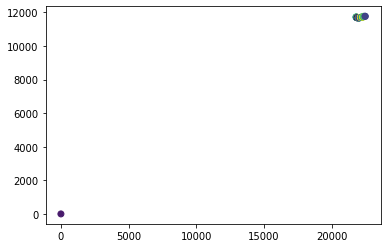

In [165]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=16)
kmeans.fit(data)
lbl = kmeans.labels_
print(lbl)
plt.scatter(data.T[0], data.T[1], c=kmeans.labels_)
plt.show()

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
outputVideo = cv2.VideoWriter('output.avi', fourcc, 20.0, (width,height))
videoCap = cv2.VideoCapture(fileName)

lbl = list(lbl)
unique_frame_index = np.sort( np.unique(lbl, return_index=True)[1] )

for i in range(32):
  success, image = videoCap.read()
  if i in set(unique_frame_index):
      print(lbl[i])
      #cv2_imshow(image)
      outputVideo.write(image)
cv2.destroyAllWindows()
outputVideo.release()
  

In [186]:
import cv2
from google.colab.patches import cv2_imshow
import sys
import os
from PIL import Image
#import Image
import matplotlib.image as mpimg
import numpy as np
import math
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def pca_image(image,components):
  l1 = PCA(n_components=components)
  l1.fit(image.T[0])

  l2 = PCA(n_components=components)
  l2.fit(image.T[1])

  l3 = PCA(n_components=components)
  l3.fit(image.T[2])

  l = [l1.singular_values_, l2.singular_values_, l3.singular_values_ ]
  return np.array(l).reshape(3*components)
# l = pca_image(image,8)
# print(l.shape)


def histogram_vector(image,n):
  hist0 = cv2.calcHist(image, [0], None, [n], [0, n])
  hist1 = cv2.calcHist(image, [1], None, [n], [0, n])
  hist2 = cv2.calcHist(image, [2], None, [n], [0, n])
  hist3 = cv2.calcHist(image, [3], None, [n], [0, n])

  return np.array([hist1,hist2,hist3]).reshape(3*n)
#hist_vector = histogram_vector(image,8)
# print(hist_vector.T.shape)
# print(image.T[0].shape)



# fileName = '/content/drive/MyDrive/Project Docments/lip sync/vid/3.mp4'
fileName = input("Enter video path - ")
number_of_frames = int(input("number_of_frames - "))
expected_number_of_frames = int(input("expected_number_of_frames - "))
videoCap = cv2.VideoCapture(fileName)
data = np.empty((24,))

for i in range(number_of_frames):
  success, image = videoCap.read()
  l = pca_image(image,8)
  data = np.vstack((data,l))
  #print(i)

data = data[1:33]
height = len(image)
width = len(image[0])
cv2.destroyAllWindows()
videoCap.release()


kmeans = KMeans(n_clusters=expected_number_of_frames)
kmeans.fit(data)
lbl = kmeans.labels_
# print(lbl)
# plt.scatter(data.T[0], data.T[1], c=kmeans.labels_)
# plt.show()


fourcc = cv2.VideoWriter_fourcc(*'XVID')
outputVideo = cv2.VideoWriter('output.avi', fourcc, 20.0, (width,height))
videoCap = cv2.VideoCapture(fileName)

lbl = list(lbl)
unique_frame_index = np.sort( np.unique(lbl, return_index=True)[1] )

for i in range(32):
  success, image = videoCap.read()
  if i in set(unique_frame_index):
      #print(lbl[i])
      #cv2_imshow(image)
      outputVideo.write(image)
cv2.destroyAllWindows()
outputVideo.release()
  

Enter video path - /content/drive/MyDrive/Project Docments/lip sync/vid/3.mp4
number_of_frames - 32
expected_number_of_frames - 16
